<a href="https://colab.research.google.com/github/JosephGesnouin/StageLiesse2021/blob/main/0_Donnees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage LIESSE – TP – Préliminaires : Exploration des données

Dans cette partie pratique nous allons utiliser un jeu de données décrivant des manchots, le jeu [Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/).

Ces données sont mises à disposition par [la base antarctique Palmer](http://pal.lternet.edu/) sous licence [CC-0](CC-0).

Le jeu de données contient des informations décrivant un certain nombre de manchots appartenant à trois espèces :
* Manchot d'Adélie (_Pygoscelis adeliae_), `Adelie` dans les données
* Manchot papou (_Pygoscelis papua_),  `Gentoo` dans les données
* Manchot à jugulaire (_Pygoscelis antarcticus_), `Chinstrap` dans les données.

__Les trois espèces de manchots:__ (illustration par @allison_horst)

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" alt="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" style="width: 400px;"/>

Pour chacun des manchots, le jeu de données contient 
* la longueur de son bec en mm (`bill_length_mm`)
* la hauteur de son bec en mm (`bill_depth_mm`)
* la longueur de ses palettes natatoires en mm (`flipper_length_mm`)
* son poids en g (`body_mass_g`)

__Caractéristiques du bec:__ (illustration par @allison_horst)

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" alt="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" style="width: 400px;"/>

## 1. Chargement des librairies

__Numpy et matplotlib__

Pour charger `numpy` et `matplotlib` dans un notebook Jupyter, nous utilisons la commande magique `%pylab inline` ([documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-pylab)) qui est équivalente à
```
import numpy as np
import matlab.pyplot as plt
```

Le mot-clé `inline` permet d'afficher les graphiques dans le corps du notebook.

In [ ]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


Pour une meilleure qualité d'affichage des graphiques, nous utilisons le format SVG.

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

__Pandas__

La librairie `pandas` nous permet de charger et manipuler les données.

In [ ]:
import pandas as pd

## 2. Chargement des données

Les données sont disponibles [au format `csv` ("comma-separated values")](https://fr.wikipedia.org/wiki/Comma-separated_values) dans le fichier `data/penguins.csv`. Nous allons les charger grâce à la librairie `pandas`.

In [ ]:
import pandas as pd
!wget https://raw.githubusercontent.com/chagaz/ml-notebooks/master/liesse/data/penguins.csv

penguins = pd.read_csv("/content/penguins.csv")

--2021-04-29 07:11:56--  https://raw.githubusercontent.com/chagaz/ml-notebooks/master/liesse/data/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16286 (16K) [text/plain]
Saving to: ‘penguins.csv.1’

penguins.csv.1      100%[===================>]  15.90K  --.-KB/s    in 0s      

2021-04-29 07:11:57 (104 MB/s) - ‘penguins.csv.1’ saved [16286/16286]



Nous pouvons maintenant visualiser la table des données :

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


__Question :__ Combien d'échantillons comporte notre jeu de données ?

__Réponse :__ La table de données contient 333 lignes, c'est donc le nombre de manchots i.e. d'échantillons. On peut aussi y accéder grâce à `penguins.shape` :

In [ ]:
penguins.shape

(333, 8)

## 3. Problème 1 : prédire le poids d'un manchot

Le premier problème que nous allons étudier dans cette session va être de prédire le poids  d'un manchot à partir de la taille (longueur et hauteur) de son bec ainsi que de la longueur de ses nageoires.

__Question :__ De quel type de problème s'agit-il ?

__Réponse :__ L'étiquette à prédire est _quantitative_, il s'agit donc d'un problème de _régression._

### Visualisation

Nous allons représenter ici le poids d'un manchot en fonction de chacune des trois variables :

In [ ]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Utilisation de SVG pour faire des figures plus nettes
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

Text(0, 0.5, 'Poids (g)')

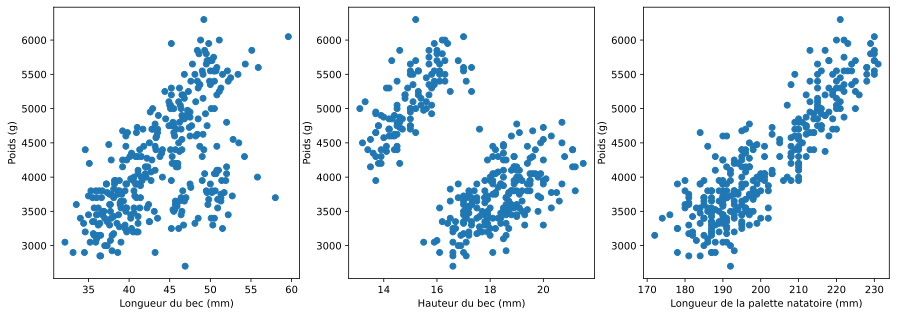

In [ ]:
fig = plt.figure(figsize=(15, 5))

# Figure 1 dans une grille (1 x 3)
ax = plt.subplot(1, 3, 1)
ax.scatter(penguins["bill_length_mm"], penguins["body_mass_g"])
plt.xlabel("Longueur du bec (mm)")
plt.ylabel("Poids (g)")

# Figure 2 dans une grille (1 x 3)
ax = plt.subplot(1, 3, 2)
ax.scatter(penguins["bill_depth_mm"], penguins["body_mass_g"])
plt.xlabel("Hauteur du bec (mm)")
plt.ylabel("Poids (g)")

# Figure 3 dans une grille (1 x 3)
ax = plt.subplot(1, 3, 3)
ax.scatter(penguins["flipper_length_mm"], penguins["body_mass_g"])
plt.xlabel("Longueur de la palette natatoire (mm)")
plt.ylabel("Poids (g)")

### Extraction des données

Nous avons formulé nos algorithmes de _machine learning_ de sorte à considérer une matrice de données $X$ (autant de lignes que d'observations, autant de colonnes que de variables) et un vecteur d'étiquettes `y` (autant d'entrées que d'observations).

__Question :__ Quelles sont les dimensions de $X$ et $y$ dans le cas du Problème 1 ?

__Réponse :__ Le nombre d'observations est le nombre de manchots (333). Le nombre de variables est 3 (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`).

Nous allons maintenant créer les arrays numpy correspondant à $X$ et $y$.

In [ ]:
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].to_numpy()
y_regress = penguins["body_mass_g"]

Vérifions que nos array ont les bonnes dimensions :

In [ ]:
print(X.shape)

(333, 3)


In [ ]:
print(y_regress.shape)

(333,)


## 4. Problème 2 : prédire le sexe d'un manchot 

Le deuxième problème que nous allons étudier dans cette session va être de prédire si un manchot est mâle ou femelle à partir de la taille (longueur et hauteur) de son bec ainsi que de la longueur de ses nageoires.

__Question :__ De quel type de problème s'agit-il ?

__Réponse :__ L'étiquette à prédire est _binaire_, il s'agit donc d'un problème de _classification binaire._

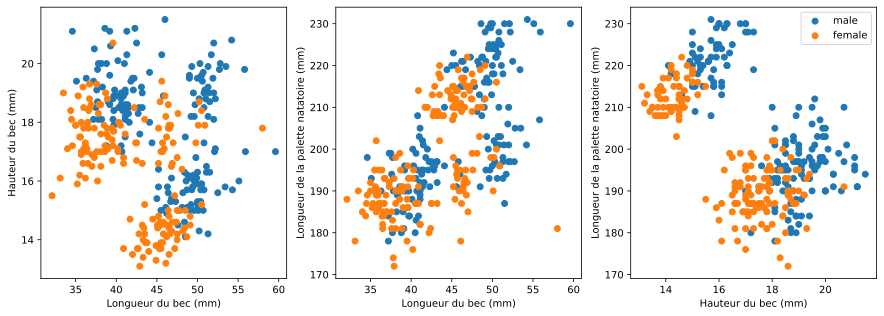

In [ ]:
fig = plt.figure(figsize=(15, 5))

# Figure 1 dans une grille (1 x 3)
ax = plt.subplot(1, 3, 1)
for penguin_sex in ["male", "female"]:
    ax.scatter(penguins.loc[penguins["sex"] == penguin_sex]["bill_length_mm"], 
               penguins.loc[penguins["sex"] == penguin_sex]["bill_depth_mm"], 
               label=penguin_sex)
plt.xlabel("Longueur du bec (mm)")
plt.ylabel("Hauteur du bec (mm)")

# Figure 2 dans une grille (1 x 3)
ax = plt.subplot(1, 3, 2)
for penguin_sex in ["male", "female"]:
    ax.scatter(penguins.loc[penguins["sex"] == penguin_sex]["bill_length_mm"], 
               penguins.loc[penguins["sex"] == penguin_sex]["flipper_length_mm"], 
               label=penguin_sex)
plt.xlabel("Longueur du bec (mm)")
plt.ylabel("Longueur de la palette natatoire (mm)")

# Figure 3 dans une grille (1 x 3)
ax = plt.subplot(1, 3, 3)
for penguin_sex in ["male", "female"]:
    ax.scatter(penguins.loc[penguins["sex"] == penguin_sex]["bill_depth_mm"], 
               penguins.loc[penguins["sex"] == penguin_sex]["flipper_length_mm"], 
               label=penguin_sex)
plt.xlabel("Hauteur du bec (mm)")
plt.ylabel("Longueur de la palette natatoire (mm)")

plt.legend()

### Extraction des données

__Question :__ Quelles sont les dimensions de $X$ et $y$ dans le cas du Problème 2 ?

__Réponse :__ Le nombre d'observations est le nombre de manchots (333). Le nombre de variables est 3 (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`).

Nous allons maintenant créer les arrays numpy correspondant à $X$ et $y$. En particulier, nous allons transformer les étiquettes `female` et `male` en 0 et 1, respectivement.

In [ ]:
y_classif = pd.Categorical(penguins["sex"]).astype('category').codes

Vérifions que nos array ont les bonnes dimensions :

In [ ]:
print(y_classif.shape)

(333,)


In [ ]:
y_classif

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,